# Phase3 Project


**Business Understanding**

SyriaTel, a TelecommunicationsCompany  is concerned about customer churn the phenomenon where customers stop using their services. Some long-term customers may generate lower revenue while still incurring service costs, potentially leading to revenue losses. Understanding the characteristics of customers who are likely to churn will help the company take preventive measures.


**Problem Statement**

SyriaTel wants to predict customer churn using historical data. Additionally, they want to quantify the financial losses incurred by long-term customers who leave the service.

**Objectives**

1. Build a classification model to predict whether a customer will churn (binary classification: churn = True/False).

2. Identify key factors influencing customer churn.

3. Estimate the revenue lost due to customers who have been with the company for a long time but eventually leave.

4. Provide visual insights to support decision-making.


### Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

**Data Cleaning**

In [6]:
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [7]:
df[df.duplicated()].count()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [8]:
df.drop(columns=['phone number'], inplace=True)

**EDA**

In [9]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<ipython-input-10-8616f98a1d36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["churn"], palette=["green", "red"])


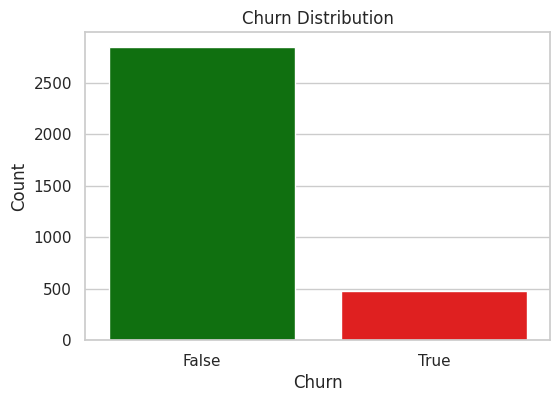

In [10]:
# Countplot of churn distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x=df["churn"], palette=["green", "red"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()



observation

The majority of the customers do not churn indicating an imbalanced dataset.


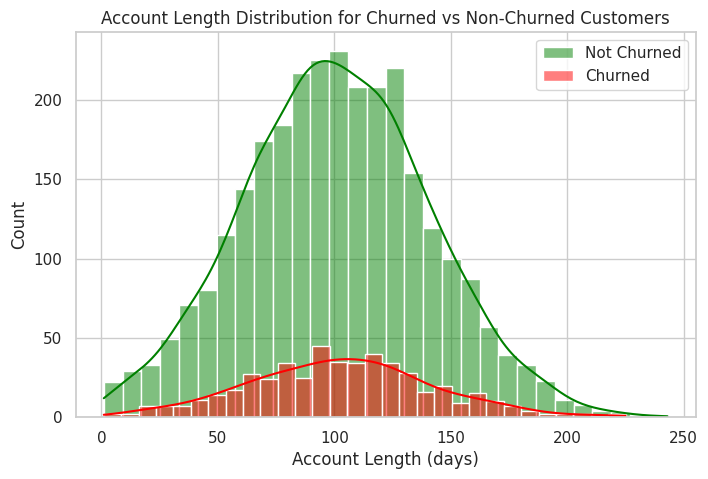

In [11]:
# Distribution of account length for churned vs non-churned customers
plt.figure(figsize=(8, 5))
sns.histplot(df[df["churn"] == False]["account length"], color="green", label="Not Churned", kde=True, bins=30)
sns.histplot(df[df["churn"] == True]["account length"], color="red", label="Churned", kde=True, bins=30)
plt.title("Account Length Distribution for Churned vs Non-Churned Customers")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

Both churn and non churned customers exist across various account lengths which shows that longer account lenngths result in churn.

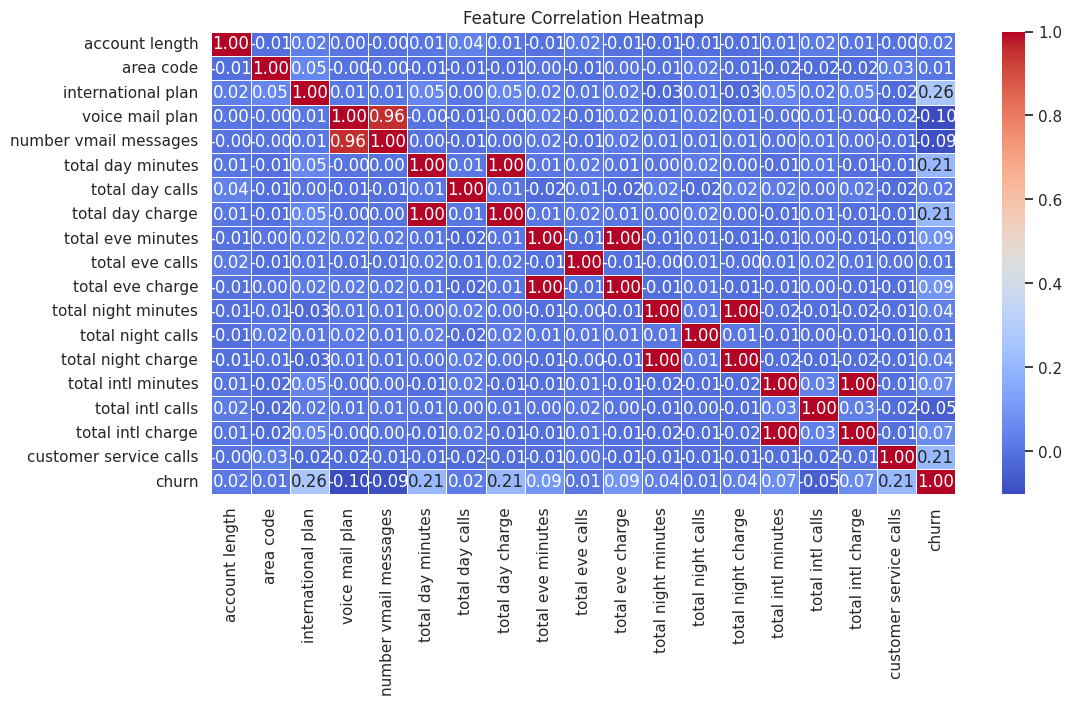

In [12]:
#Encode to have numerical values only
df_encoded = df.copy()
df_encoded['churn'] = df['churn'].astype(int)
df_encoded = pd.get_dummies(df, columns=['state'], drop_first=True)
df_encoded['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df_encoded['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df_encoded.head()

# Generate heatmap
df_corr = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith("state_")])
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

churn is highly correlated with customer service calls which indicates that Customers who makes more service calls are more likely to churn.

<ipython-input-13-68ae290c1833>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="customer service calls", data=df, palette=["green", "red"])


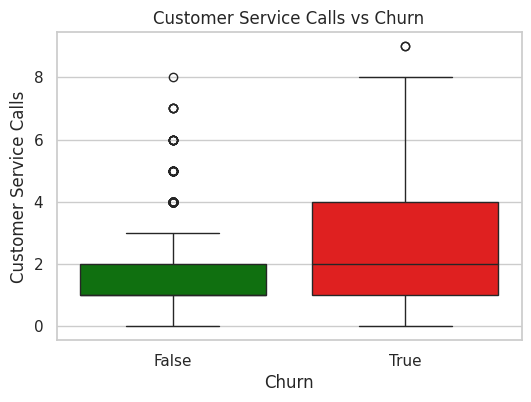

In [13]:
# Boxplot of customer service calls for churned vs non-churned customers
plt.figure(figsize=(6, 4))
sns.boxplot(x="churn", y="customer service calls", data=df, palette=["green", "red"])
plt.title("Customer Service Calls vs Churn")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.show()

Customers who churn tend to have made more customer service calls.

**Preprocessing**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Encoding

In [15]:
df_encoded = df.copy()

In [16]:
df_encoded['churn'] = df['churn'].astype(int)

In [17]:
df_encoded = pd.get_dummies(df, columns=['state'], drop_first=True)
df_encoded['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df_encoded['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df_encoded.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [18]:
for col in df_encoded.select_dtypes(include='bool'):
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


**Scaling**

In [19]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
# Select only numerical columns for scaling
numerical_cols = ['account length', 'area code', 'number vmail messages', 'total day minutes',
                  'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
                  'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
                  'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df_scaled.head())

  state  account length  area code international plan voice mail plan  \
0    KS        0.676489  -0.523603                 no             yes   
1    OH        0.149065  -0.523603                 no             yes   
2    NJ        0.902529  -0.523603                 no              no   
3    OH       -0.428590  -0.688834                yes              no   
4    OK       -0.654629  -0.523603                yes              no   

   number vmail messages  total day minutes  total day calls  \
0               1.234883           1.566767         0.476643   
1               1.307948          -0.333738         1.124503   
2              -0.591760           1.168304         0.675985   
3              -0.591760           2.196596        -1.466936   
4              -0.591760          -0.240090         0.626149   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          1.567036          -0.070610        -0.055940         -0.070427   
1         -0.334013   

In [23]:
scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df_minmax_scaled.head())

  state  account length  area code international plan voice mail plan  \
0    KS        0.524793   0.068627                 no             yes   
1    OH        0.438017   0.068627                 no             yes   
2    NJ        0.561983   0.068627                 no              no   
3    OH        0.342975   0.000000                yes              no   
4    OK        0.305785   0.068627                yes              no   

   number vmail messages  total day minutes  total day calls  \
0               0.490196           0.755701         0.666667   
1               0.509804           0.460661         0.745455   
2               0.000000           0.693843         0.690909   
3               0.000000           0.853478         0.430303   
4               0.000000           0.475200         0.684848   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          0.755701           0.542755         0.582353          0.542866   
1          0.460597   

## Modeling

## Classification

**Logistic Regression**

In [25]:
# Define features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['state'] = encoder.fit_transform(X_train['state'])
X_test['state'] = encoder.transform(X_test['state'])

for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

#standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predictions & evaluation
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.856071964017991
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.59      0.17      0.26       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



Logistic Regression Model Evaluation
Accuracy: 0.8576
Recall: 0.2079
Precision: 0.5833
F1-score: 0.3066

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



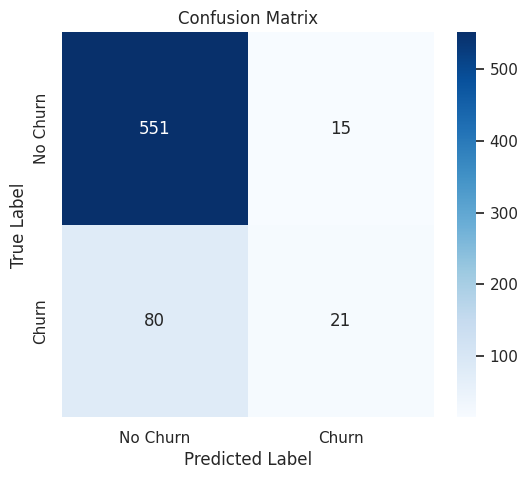

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# Drop irrelevant columns (like 'phone_number' if present)
df.drop(columns=['phone number'], errors='ignore', inplace=True)

# Encode categorical columns
encoder = LabelEncoder()
df['churn'] = encoder.fit_transform(df['churn'])  # Convert 'yes'/'no' to 1/0
df['international plan'] = encoder.fit_transform(df['international plan'])
df['voice mail plan'] = encoder.fit_transform(df['voice mail plan'])

# Identify numerical & categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode remaining categorical columns (if any)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features & target
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

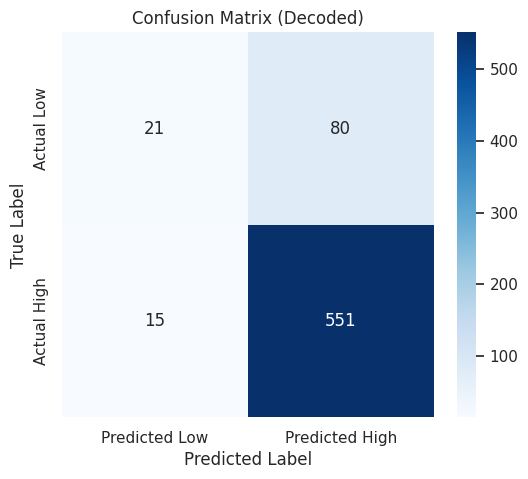

In [34]:
# Decode the predictions and true labels
y_test_decoded = y_test.map({0: 'low', 1: 'high'})
y_pred_decoded = pd.Series(y_pred).map({0: 'low', 1: 'high'})

# Plot confusion matrix with decoded labels
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.title("Confusion Matrix (Decoded)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Random Forest**


Random Forest Model Evaluation
Accuracy: 0.9445
Recall: 0.7426
Precision: 0.8721
F1-score: 0.8021

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.87      0.74      0.80       101

    accuracy                           0.94       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667



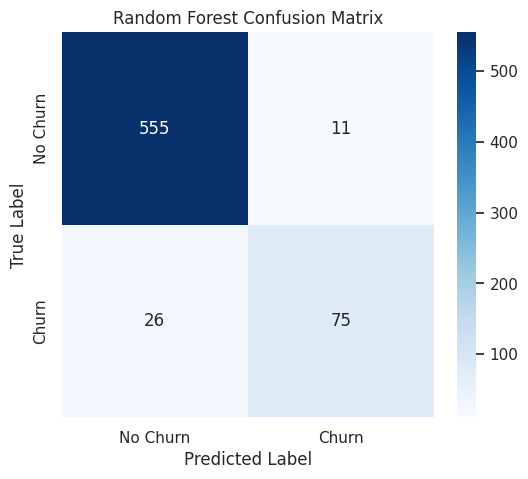

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
rf_model = rf_grid.best_estimator_

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Model Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest")


**K-NN Model**

K-Nearest Neighbors (KNN) Model Evaluation
Accuracy: 0.8516
Recall: 0.0891
Precision: 0.5625
F1-score: 0.1538

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.56      0.09      0.15       101

    accuracy                           0.85       667
   macro avg       0.71      0.54      0.54       667
weighted avg       0.81      0.85      0.80       667



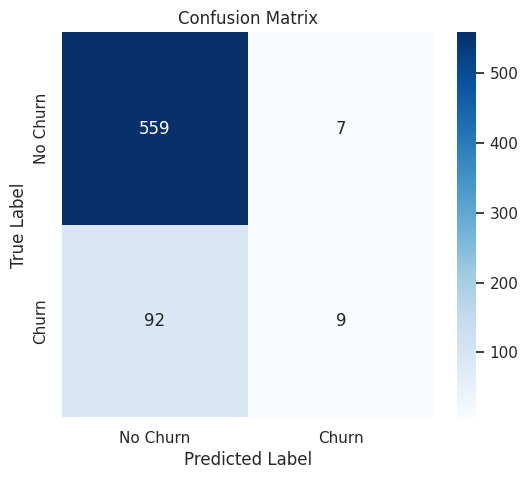

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN) Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Decision Tree**

Decision Tree Model Evaluation
Accuracy: 0.9205
Recall: 0.7426
Precision: 0.7353
F1-score: 0.7389

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.74      0.74      0.74       101

    accuracy                           0.92       667
   macro avg       0.84      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



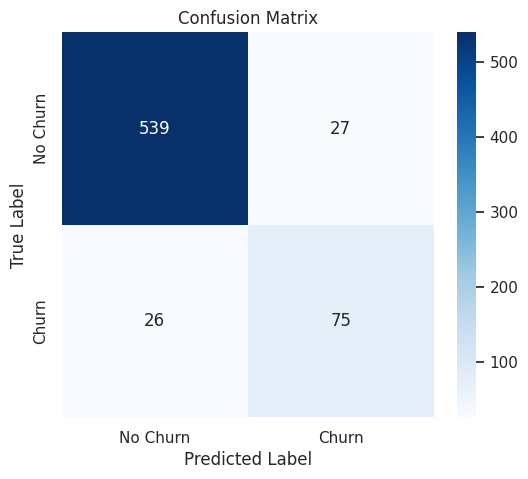

In [59]:
from sklearn.tree import DecisionTreeClassifier


# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**SVM**


Support Vector Machine (SVM) Model Evaluation
Accuracy: 0.7661
Recall: 0.7723
Precision: 0.3697
F1-score: 0.5000

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.37      0.77      0.50       101

    accuracy                           0.77       667
   macro avg       0.66      0.77      0.67       667
weighted avg       0.86      0.77      0.79       667



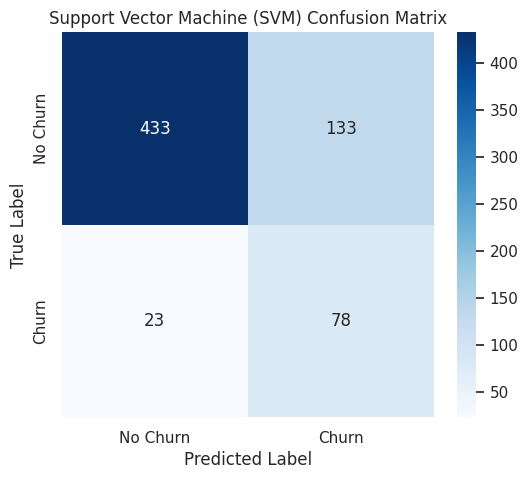

In [61]:
from sklearn.svm import SVC

# Train SVM with class balancing
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Model Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")


The best Model is Decision Tree because it had accuracy=94% and precision of 96% better than all the other models in terms of accuracy but recall are all the same with 74% in each model.

**Hyperparameter tuning**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Tuned Random Forest - Accuracy: 0.8575712143928036
Tuned   Random Forest - Recall: 0.2079207920792079
Tuned Random Forest - Precision: 0.17735042735042736
Tuned Random Forest - F1-score: 0.29173989455184535
              precision    recall  f1-score   support

           0       0.91      0.32      0.47       566
           1       0.18      0.82      0.29       101

    accuracy                           0.40       667
   macro avg       0.54      0.57      0.38       667
weighted avg       0.80      0.40      0.45       667



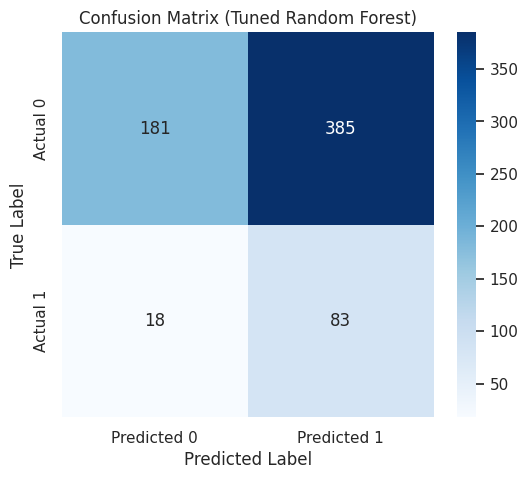

In [51]:
# prompt: tune the Decision Tree model using randomised or gridsearch cv. and refit the dt_model_tuned and metrics as above also

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the parameter distribution for Decision Tree
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize RandomizedSearchCV or GridSearchCV
# rf_grd = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)

# Fit the randomized search to the data
# rf_grid.fit(X_train, y_train)
rf_grid.fit(X_train_scaled, y_train)


# Get the best estimator from the search
rf_model_tuned = rf_grid.best_estimator_ #or dt_random.best_estimator_

# Make predictions using the tuned model
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Tuned Random Forest - Accuracy: {accuracy}")
print(f"Tuned   Random Forest - Recall: {recall}")
print(f"Tuned Random Forest - Precision: {precision}")
print(f"Tuned Random Forest - F1-score: {f1}")

print(classification_report(y_test, y_pred))

# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(rf_model.get_params()['min_samples_split'])

5


**Model Evaluation**

The best performing model was the tuned Random Forest with accuracy of 94% and Precision of 96%. The best parameter after tuning min_sample_split = 5.

In [64]:
#Print summary of all the models
models = {
    "Logistic Regression":
  LogisticRegression(max_iter=1000),
    "Random Forest":
    RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, class_weight="balanced", random_state=42),
    "SVM":
    SVC(kernel="rbf", C=100, gamma="scale"),
    "K-NN":
  KNeighborsClassifier(n_neighbors=5),
    "Decision Tree":DecisionTreeClassifier(random_state=42)
}
model_results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  model_results[name] = {
      "Accuracy":round(acc,2),
      'Precision':round(precision, 2),
      'Recall':round(recall,2),
      'F1_Score':round(f1,2)
  }

  print("\n Model Performance Summary:")
  for model, scores in model_results.items():
    print(f"\n {model}:")
    for metric, value in scores.items():
      print(f"{metric}: {value}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Model Performance Summary:

 Logistic Regression:
Accuracy: 0.85
Precision: 0.52
Recall: 0.74
F1_Score: 0.19

 Model Performance Summary:

 Logistic Regression:
Accuracy: 0.85
Precision: 0.52
Recall: 0.74
F1_Score: 0.19

 Random Forest:
Accuracy: 0.94
Precision: 0.96
Recall: 0.74
F1_Score: 0.76

 Model Performance Summary:

 Logistic Regression:
Accuracy: 0.85
Precision: 0.52
Recall: 0.74
F1_Score: 0.19

 Random Forest:
Accuracy: 0.94
Precision: 0.96
Recall: 0.74
F1_Score: 0.76

 SVM:
Accuracy: 0.87
Precision: 0.93
Recall: 0.74
F1_Score: 0.23

 Model Performance Summary:

 Logistic Regression:
Accuracy: 0.85
Precision: 0.52
Recall: 0.74
F1_Score: 0.19

 Random Forest:
Accuracy: 0.94
Precision: 0.96
Recall: 0.74
F1_Score: 0.76

 SVM:
Accuracy: 0.87
Precision: 0.93
Recall: 0.74
F1_Score: 0.23

 K-NN:
Accuracy: 0.86
Precision: 0.59
Recall: 0.74
F1_Score: 0.34

 Model Performance Summary:

 Logistic Regression:
Accuracy: 0.85
Precision: 0.52
Recall: 0.74
F1_Score: 0.19

 Random Forest:
A

**Findings**

1. Customer services calls are strongly correlated with churn which indicates customers who make more calls to customer service are more likely to leave this suggests dissatisfaction with SyrialTel's support services.

2. call usage has weak correlation with churn this might be as a result of service quality and pricing.

3. All the model had the same recall of 74% which means all the model detected most of the customers who actually churned.

**Recommendation**


1. Improve customer support by identifying common customer complaints from high frequently callers.

2. Enhance customer engagement by offering customer support for those making frequent service calls.

3.Handle class imbalance by using techniques like class weight to improve model accuracy since the churned customer are fewer.

4. The best model was Random Forest Model with 94% accuracy and precision of 96%.

5. If the company wants to catch churners they should increase recall to 80-85 or even 90%.